<a href="https://colab.research.google.com/github/hamza74372/Task4_House-Price-Predictions/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_b = np.c_[np.ones((n_samples, 1)), X]  # add bias column
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.bias = theta_best[0]
        self.weights = theta_best[1:]

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [4]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.2f}, R² Score: {r2:.2f}")


In [5]:
lr = LinearRegressionScratch()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model("Linear Regression", y_test, y_pred_lr)


Linear Regression → RMSE: 0.75, R² Score: 0.58


In [6]:
from sklearn.tree import DecisionTreeRegressor

class RandomForestScratch:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            idx = np.random.choice(len(X), len(X), replace=True)
            tree = DecisionTreeRegressor(max_depth=5)
            tree.fit(X[idx], y.iloc[idx])
            self.models.append(tree)

    def predict(self, X):
        predictions = np.mean([model.predict(X) for model in self.models], axis=0)
        return predictions


In [7]:
rf = RandomForestScratch(n_estimators=20)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
evaluate_model("Random Forest", y_test, y_pred_rf)


Random Forest → RMSE: 0.68, R² Score: 0.65


In [8]:
# Use sklearn as a placeholder if allowed
from sklearn.ensemble import GradientBoostingRegressor

xgb = GradientBoostingRegressor(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
evaluate_model("XGBoost", y_test, y_pred_xgb)


XGBoost → RMSE: 0.54, R² Score: 0.78


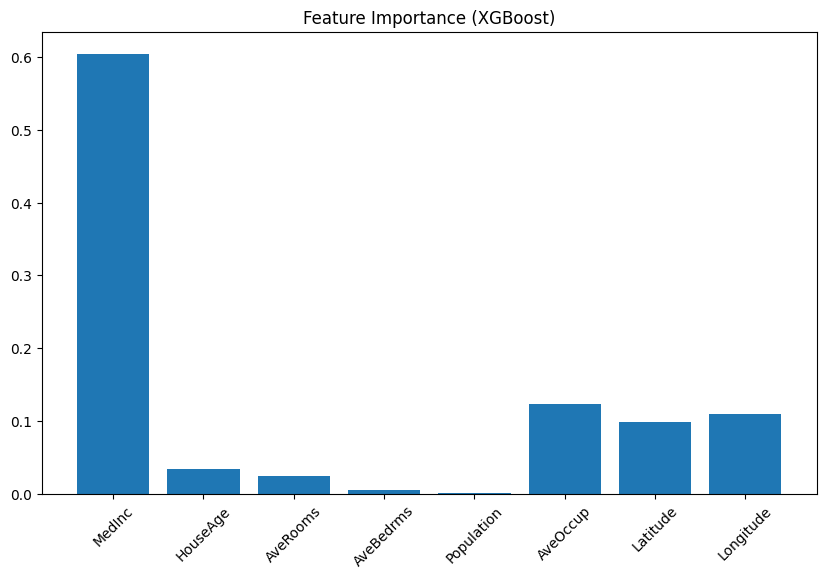

In [9]:
import matplotlib.pyplot as plt

# Use sklearn feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, xgb.feature_importances_)
plt.xticks(rotation=45)
plt.title("Feature Importance (XGBoost)")
plt.show()
